In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 워드크라우드에 사용할 라이브러리를 불러옵니다
import pandas as pd
import numpy as np
import re

In [3]:
pd.read_csv('tweets_2022.csv', encoding = 'utf-8')

0
0     BMQ2IYZ8KT4R7VU\n\n영월여행의\n증량\n재료쇼핑몰\n칼라거펠트\n강남...
1     수원에 푸딩맛집 탐라에 흘러들어와서 오!하고 가보려 했더니만..ㅎㅎ\n애견동반은 가...
2     I37L0HJNRADC\n\n현장목수\n책글귀\n을지로회식\n피화기마을\n동원\n제...
3     IPWYFD8K0R3S\n\n그림같은사진\n시베리안허스키\n슬픈\n4기\n애견동반가...
4     6LQERSCDVBTWH\n\n스톤아트\n두뇌로\n한국관광공사\n셀프재료\n서면젤\...
...                                                 ...
1149  #박지훈 #헬로메이 \n&lt;2022년 박지훈의 계획&gt;\n\n- 맥스랑 해보...
1150  오늘 카페상주견 있는 애견동반카페 갔는데,, 김탄 개웃김 자기 크기 2배 정도 되는...
1151  여자친구도 30대가 되었다\n축하해~☺️🙏 30대 레즈비언으로 진입한걸 환영해~~☺...
1152  오늘간 애견(동반)카페는 지금까지 같던\n동반카페들보다 제약이 있었는데\n그중 제일...
1153  우리 동생 일하는...카페에 가족 다 같이 놀러가기로 했어요...애견동반카페라 강아...

[1154 rows x 1 columns]

# wordcloud 세팅

In [4]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [5]:
# 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다.
corpus = DoublespaceLineCorpus('tweets_2022.csv')
len(corpus)

3455

In [6]:
word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.138 Gb


In [7]:
corpus = DoublespaceLineCorpus('tweets_2022.csv', iter_sent = True)
len(corpus)

3138

In [8]:
# 잘 변환 되었는지 4개만 돌려보기 -> 문장을 토큰화 해보자 
i = 0
for d in corpus:
    print(i,d)
    i +=1
    if i > 4 :
        break

0 0
1 "BMQ2IYZ8KT4R7VU
2 영월여행의
3 증량
4 재료쇼핑몰


## RegexTokenizer 사용하기
https://github.com/lovit/soynlp
-  soynlp 는 세 가지 토크나이저를 제공
- LTokenizer : L parts 에는 명사/동사/형용사/부사가 위치할 수 있습니다. 어절에서 L 만 잘 인식한다면 나머지 부분이 R parts 가 됩니다. LTokenizer 에는 L parts 의 단어 점수를 입력합니다.

- MaxScoreTokenizer : 띄어쓰기가 제대로 지켜지지 않은 데이터라면, 문장의 띄어쓰기 기준으로 나뉘어진 단위가 L + [R] 구조라 가정할 수 없습니다. 하지만 사람은 띄어쓰기가 지켜지지 않은 문장에서 익숙한 단어부터 눈에 들어옵니다. 이 과정을 모델로 옮긴 MaxScoreTokenizer 역시 단어 점수를 이용합니다.

- RegexTokenizer : 규칙 기반으로도 단어열을 만들 수 있습니다. 언어가 바뀌는 부분에서 우리는 단어의 경계를 인식합니다. 예를 들어 "아이고ㅋㅋㅜㅜ진짜?" 는 [아이고, ㅋㅋ, ㅜㅜ, 진짜, ?]로 쉽게 단어열을 나눕니다.

In [9]:
df = pd.read_csv("tweets_2022.csv", encoding="utf-8")

In [10]:
p1 = r'.*(애견동반 | 아직 | 제약 | 안 | 있다 ).*'
pro1 = df[df['0'].str.match(p1)]
pro1.shape

(340, 1)

In [11]:
pro1.head()

0
5   #생활문화 가족 여행 숙소로 제격인 고성 오션투유리조트 feat.애견동반 가능 ht...
7   하 애견카페 갔다가 애견동반 고깃집 갔는데 너무 귀엽죠오…🥹 https://t.co...
17  ㄱr끔 울애기 보고시퍼 하시는 님들이 계셔서 올렷따 지울 내때낑 보여드림 :) 울애...
18  수원 근처 가시면 다른 웨이팅 길어지는 가게 가시지마시고 온새미로 가보셔요들 뷰도 ...
19  저희 집 멍멍님이  한건 햇습니다😎(애견동반 가능한 음식점임 https://t.co...

In [12]:
sample_index = 10

In [13]:
sample_content = df['0'][sample_index]
sample_content

'@_with_dog 앗 즈이 직원네 집이 포항월포근처에서 애견동반펜션을 합니다!!\n그 집도 어린아이 둘이라 칠드런 대환영이요!!'

In [14]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [15]:
tokened_content = tokenizer.tokenize(sample_content)
sample_content[:]

'@_with_dog 앗 즈이 직원네 집이 포항월포근처에서 애견동반펜션을 합니다!!\n그 집도 어린아이 둘이라 칠드런 대환영이요!!'

In [16]:
#  파이썬 개행문자 제거 
##(출처: 오늘코드 | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
         text = re.sub('\\\\n', ' ', text)
         return text

In [17]:
sentences01 = df['0'].apply(preprocess)

In [18]:
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


0       [BMQ, 2, IYZ, 8, KT, 4, R, 7, VU, 영월여행의, 증량, 재...
1       [수원에, 푸딩맛집, 탐라에, 흘러들어와서, 오, !, 하고, 가보려, 했더니만, ...
2       [I, 37, L, 0, HJNRADC, 현장목수, 책글귀, 을지로회식, 피화기마을...
3       [IPWYFD, 8, K, 0, R, 3, S, 그림같은사진, 시베리안허스키, 슬픈...
4       [6, LQERSCDVBTWH, 스톤아트, 두뇌로, 한국관광공사, 셀프재료, 서면젤...
                              ...                        
1149    [#, 박지훈, #, 헬로메이, &, lt, ;, 2022, 년, 박지훈의, 계획,...
1150    [오늘, 카페상주견, 있는, 애견동반카페, 갔는데, ,,, 김탄, 개웃김, 자기, ...
1151    [여자친구도, 30, 대가, 되었다, 축하해, ~☺️🙏, 30, 대, 레즈비언으로,...
1152    [오늘간, 애견, (, 동반, ), 카페는, 지금까지, 같던, 동반카페들보다, 제약...
1153    [우리, 동생, 일하는, ..., 카페에, 가족, 다, 같이, 놀러가기로, 했어요,...
Name: 0, Length: 1154, dtype: object

# 워드클라우드 생성

In [19]:
#선명한 display를 위해 retina 옵션 추가 
%config InlineBackend.figure_format = 'retina'

In [20]:
# 워드클라우드에 필요한 라이브러리를 불러옵니다 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
# 워드클라우드 라이브러리를 불러옵니다 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [22]:
# 워드클라우드 폰트 지정 
#  https://www.inflearn.com/questions/31934
fontpath = 'C:/Users/LG/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf'

In [23]:
import matplotlib.pyplot as plt    
%matplotlib inline 

In [59]:
stopwords_kr = ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을'
 ,'사장이', '제품은', '개의', '다른', '지금까지', '않았습니다', '이', '두',
 '않습니다','https', 't', 'co', 'amp', '일단은혁이', '아부라소바', '치킨', 
    '저도', '보고', '수 있는', 'ㅋㅋㅋ', '출처','크림리조또','하트독', 'via', 'fsjUKK6uhV',
               'YouTube', 'vlog','크림 리조또', '크림', '야호펫','잘','왜','으로','인데','리조또']

In [60]:
def displayWordCloud(data = None,
                     backgroundcolor = 'white', 
                     width = 1200,
                     height = 900):
    wordcloud = WordCloud(
    font_path = fontpath,
    stopwords = stopwords_kr,
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [56]:
p1 = r'.*(애견 | 동반 | 가능 | 제약 | 안 | 어디 | 추천 | 맛집 ).*'
collect01 = df[df['0'].str.match(p1)]
collect01.shape

(238, 1)

Wall time: 0 ns
Wall time: 0 ns


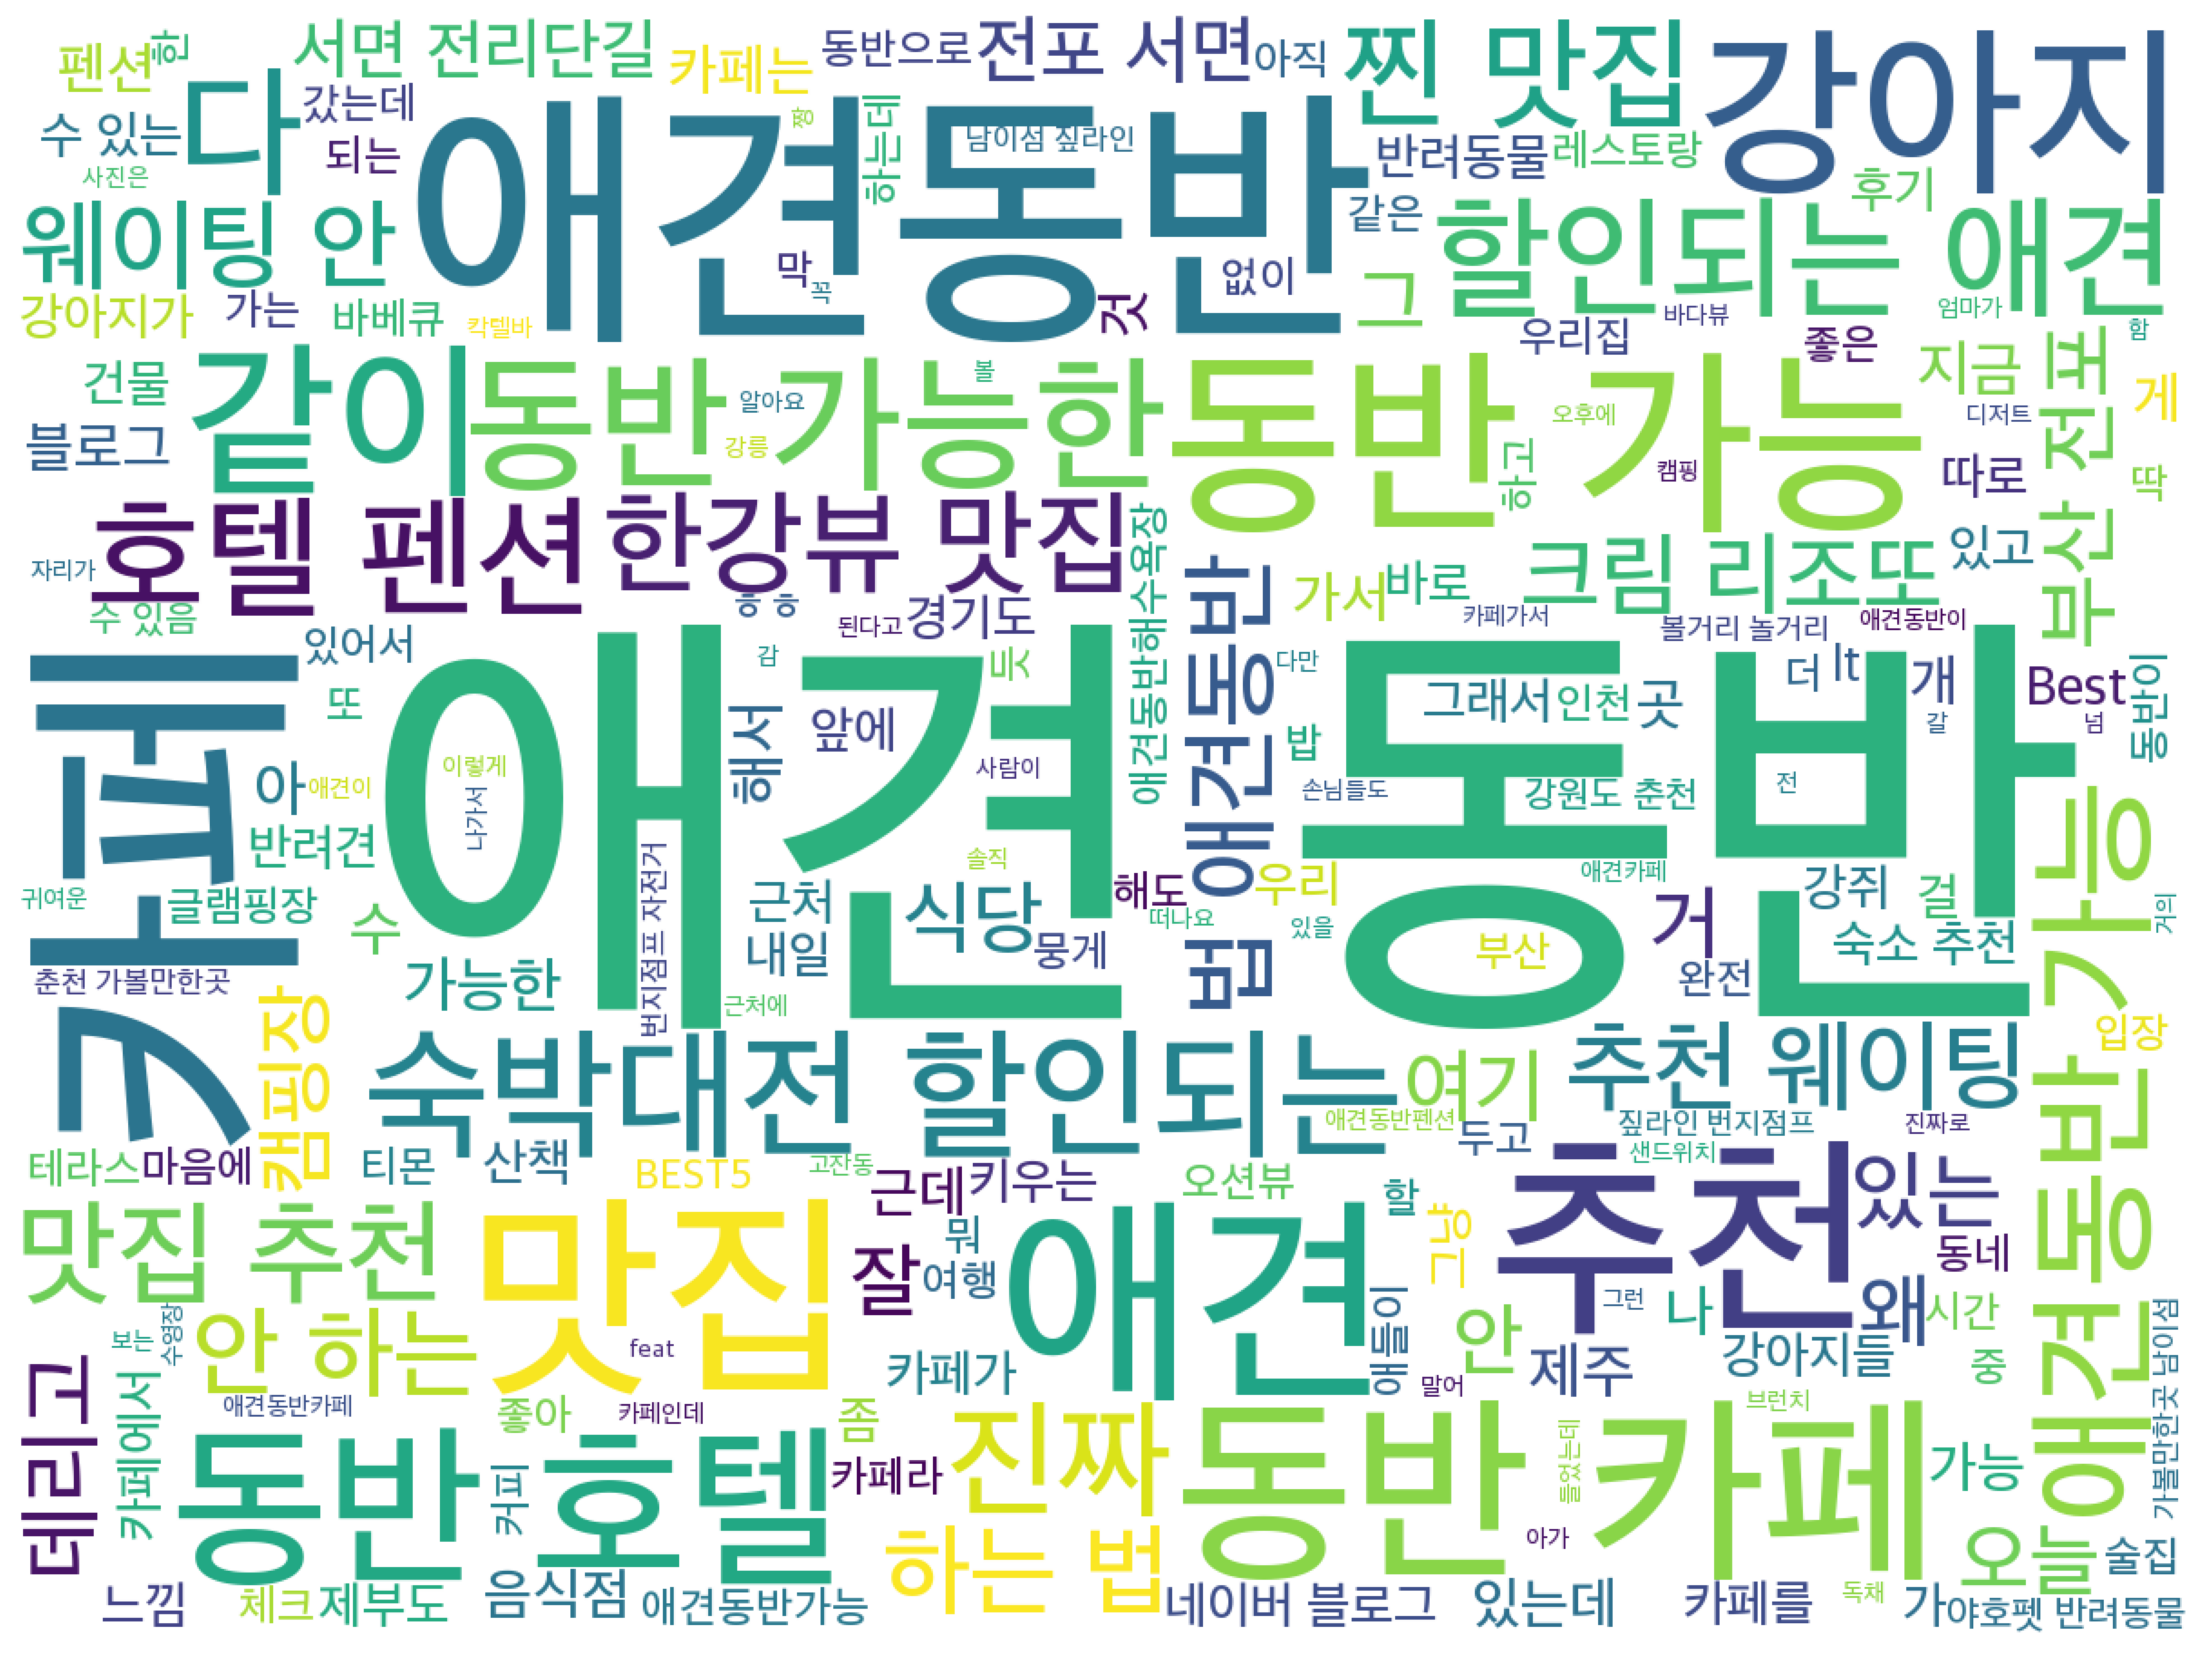

In [49]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

Wall time: 0 ns
Wall time: 0 ns


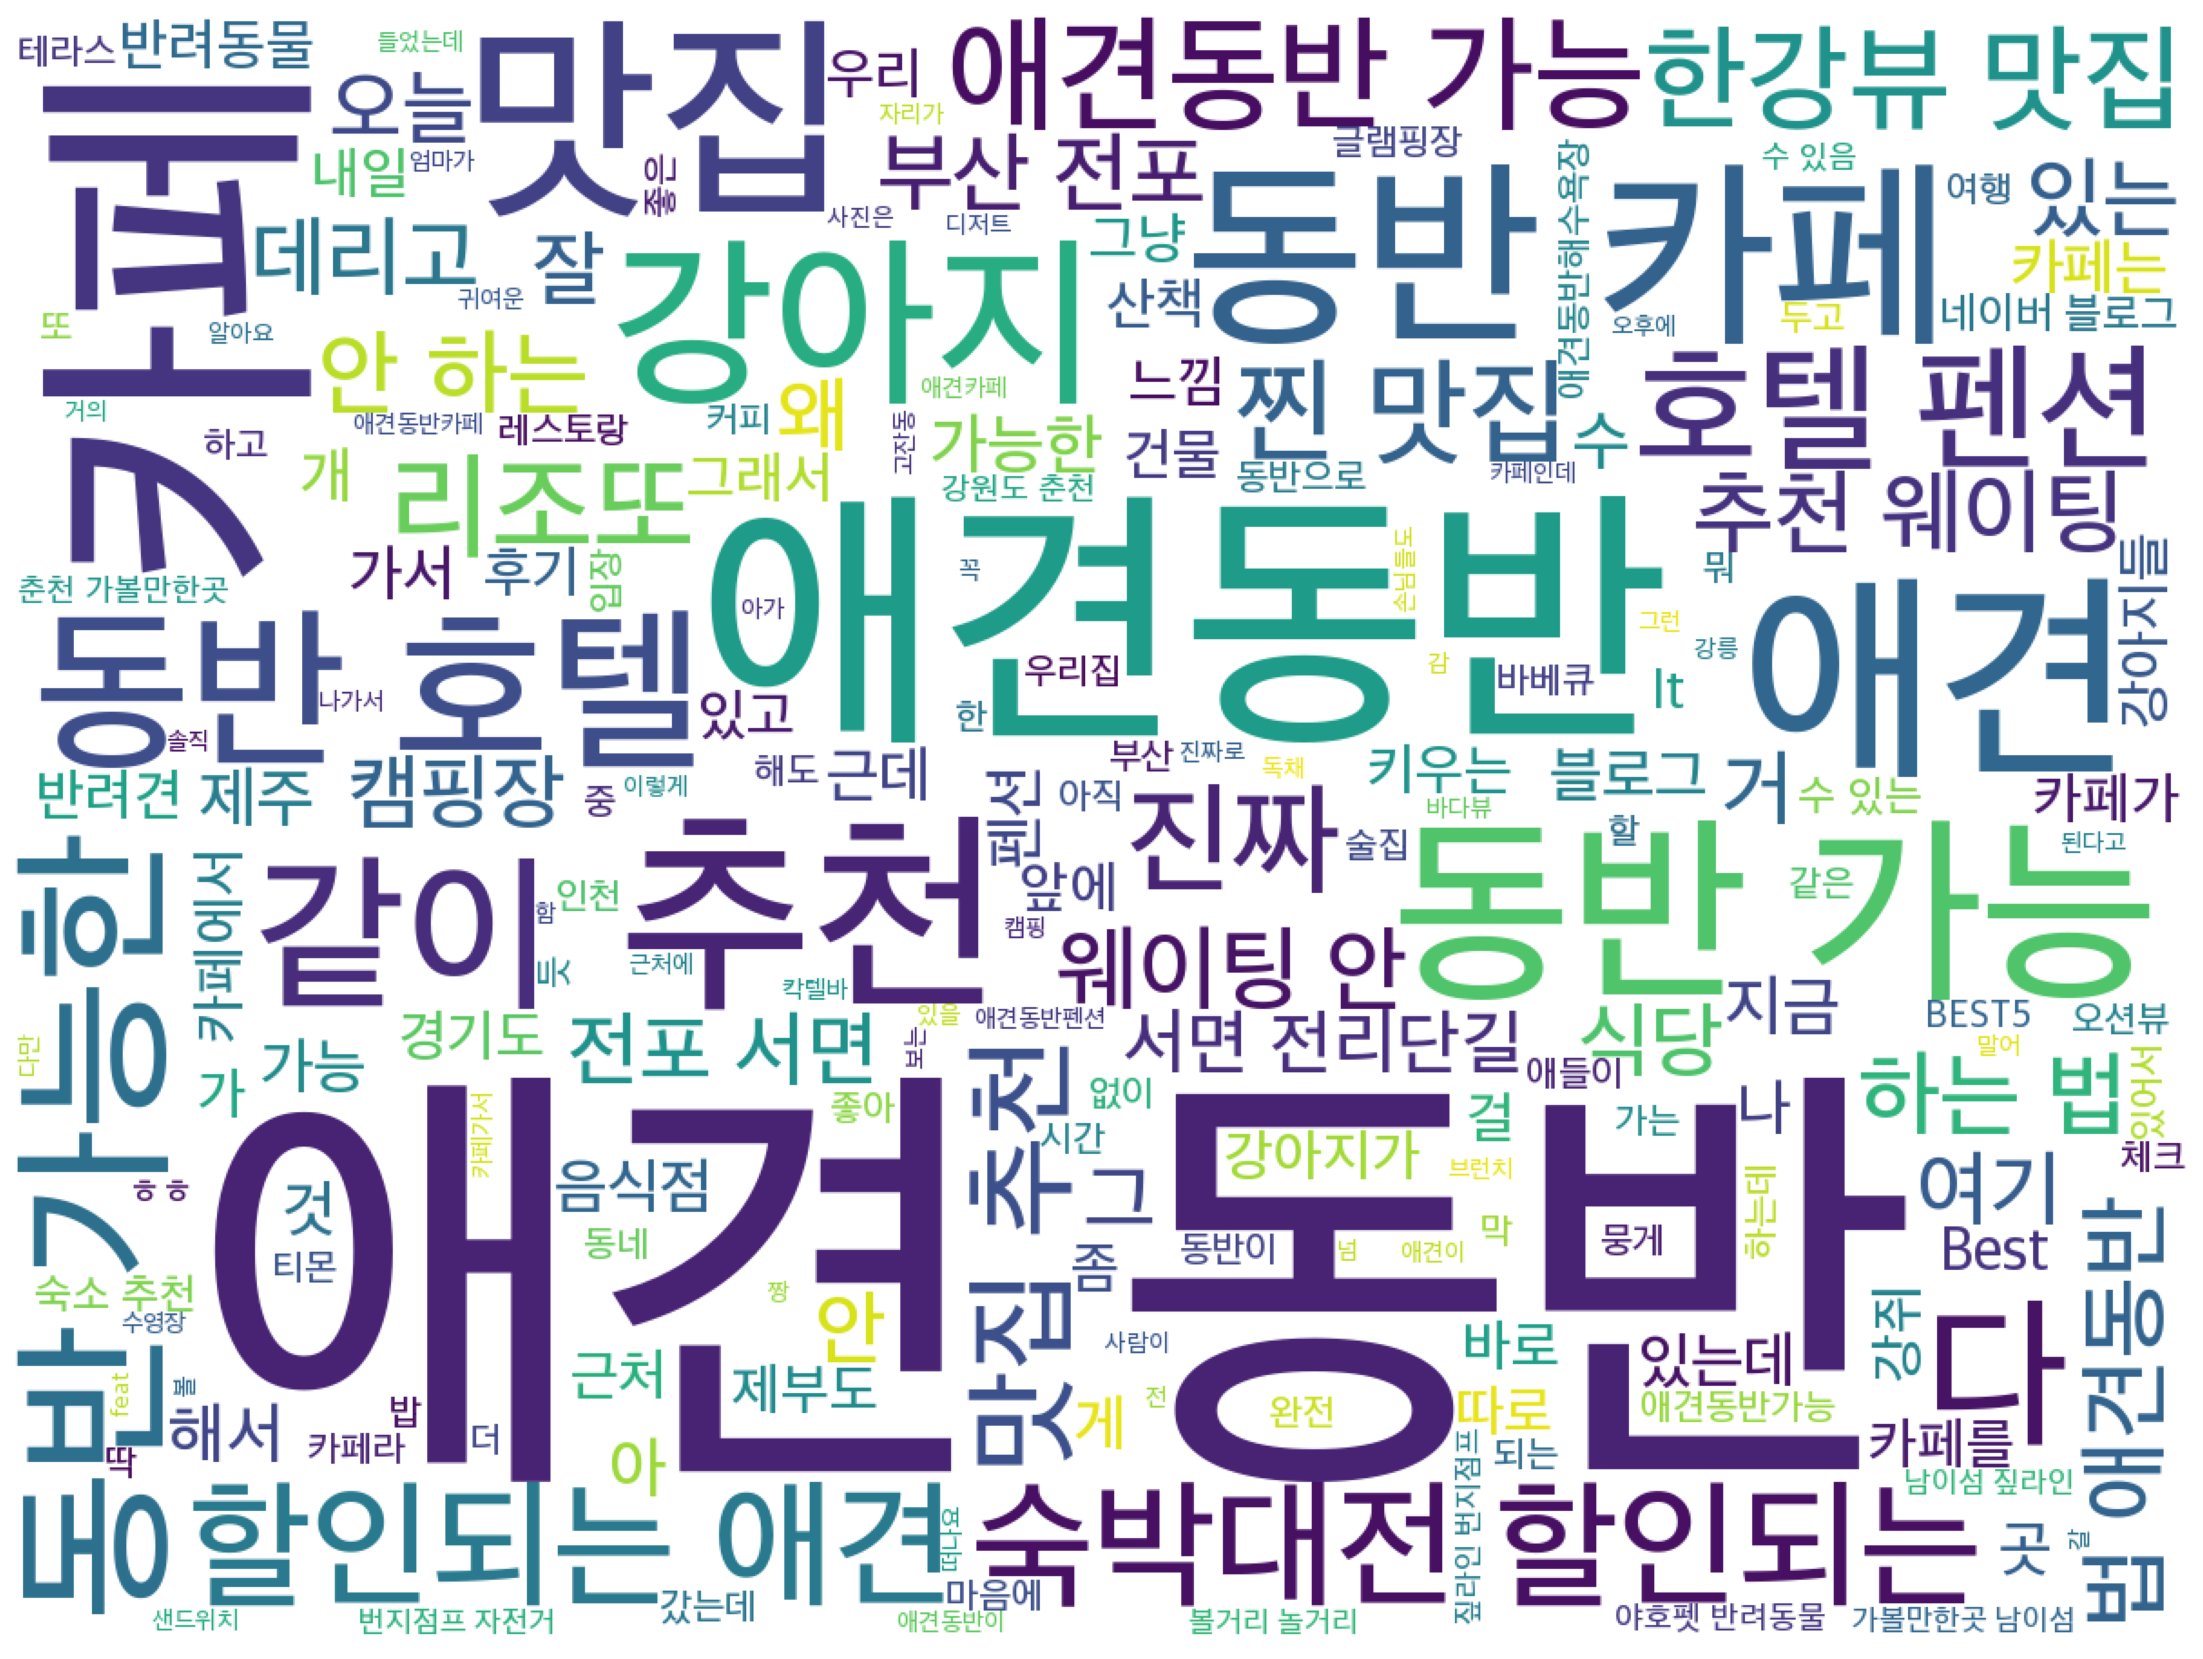

In [53]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

Wall time: 0 ns
Wall time: 0 ns


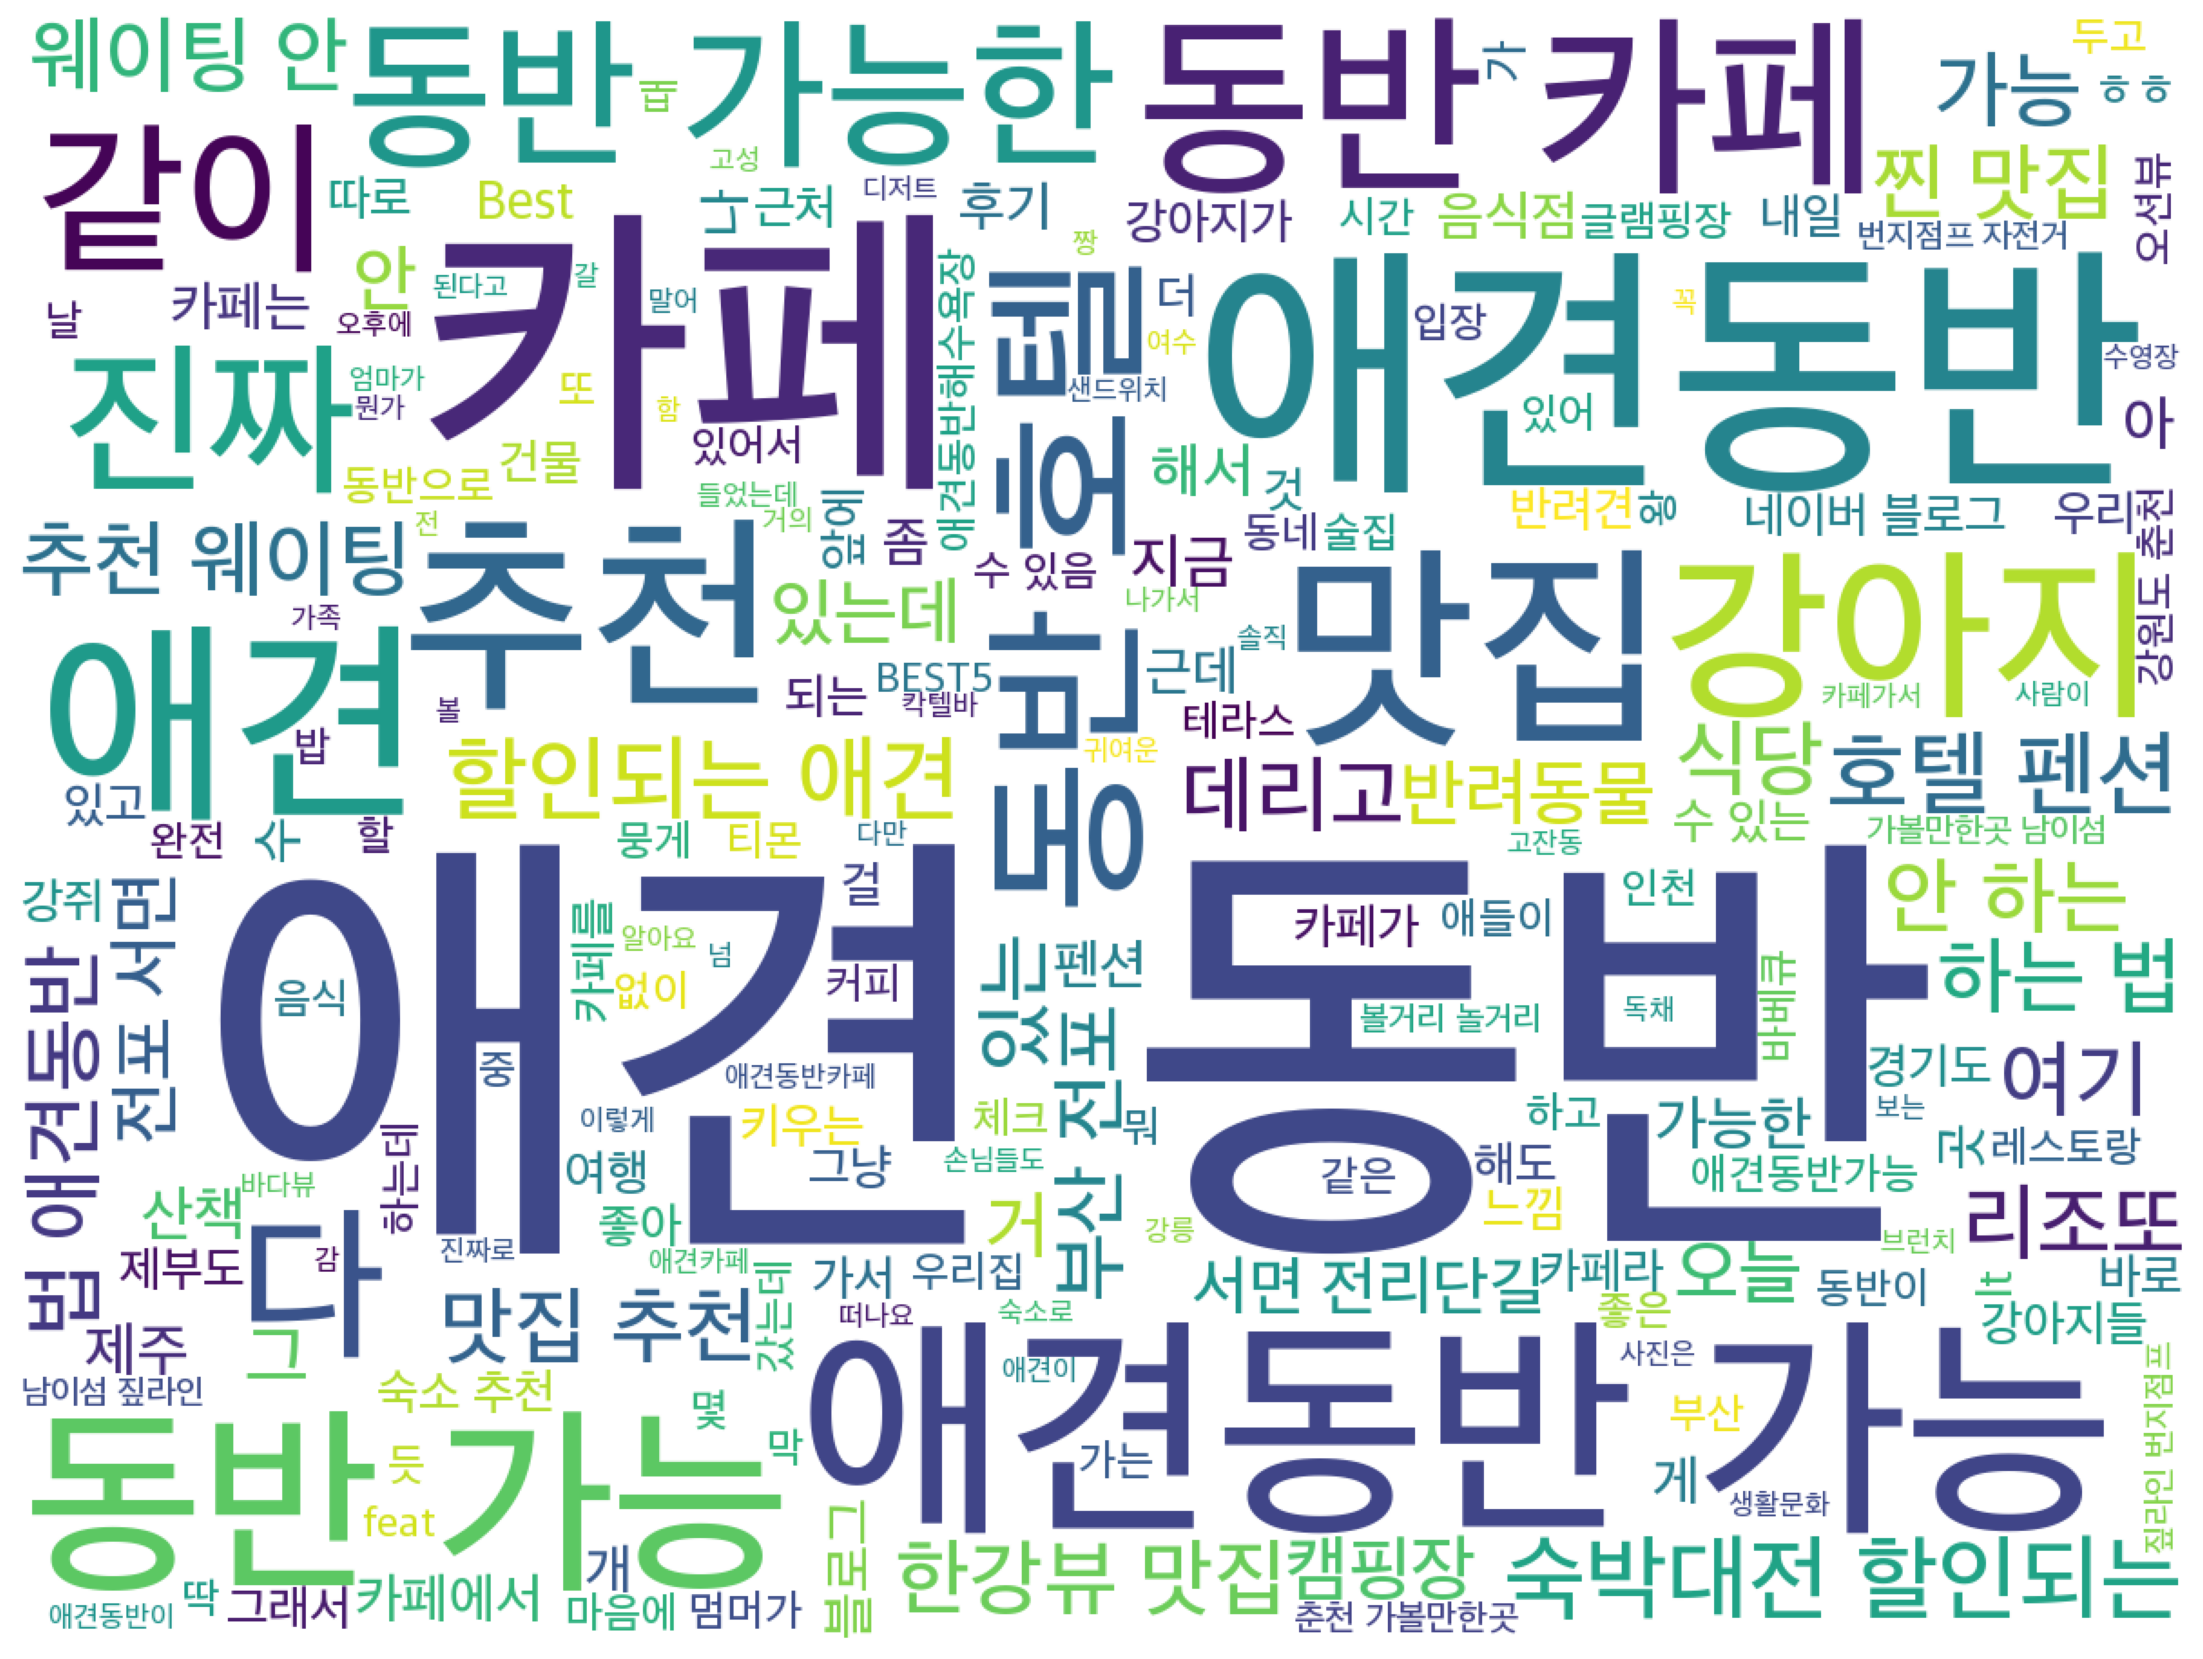

In [58]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

Wall time: 0 ns
Wall time: 0 ns


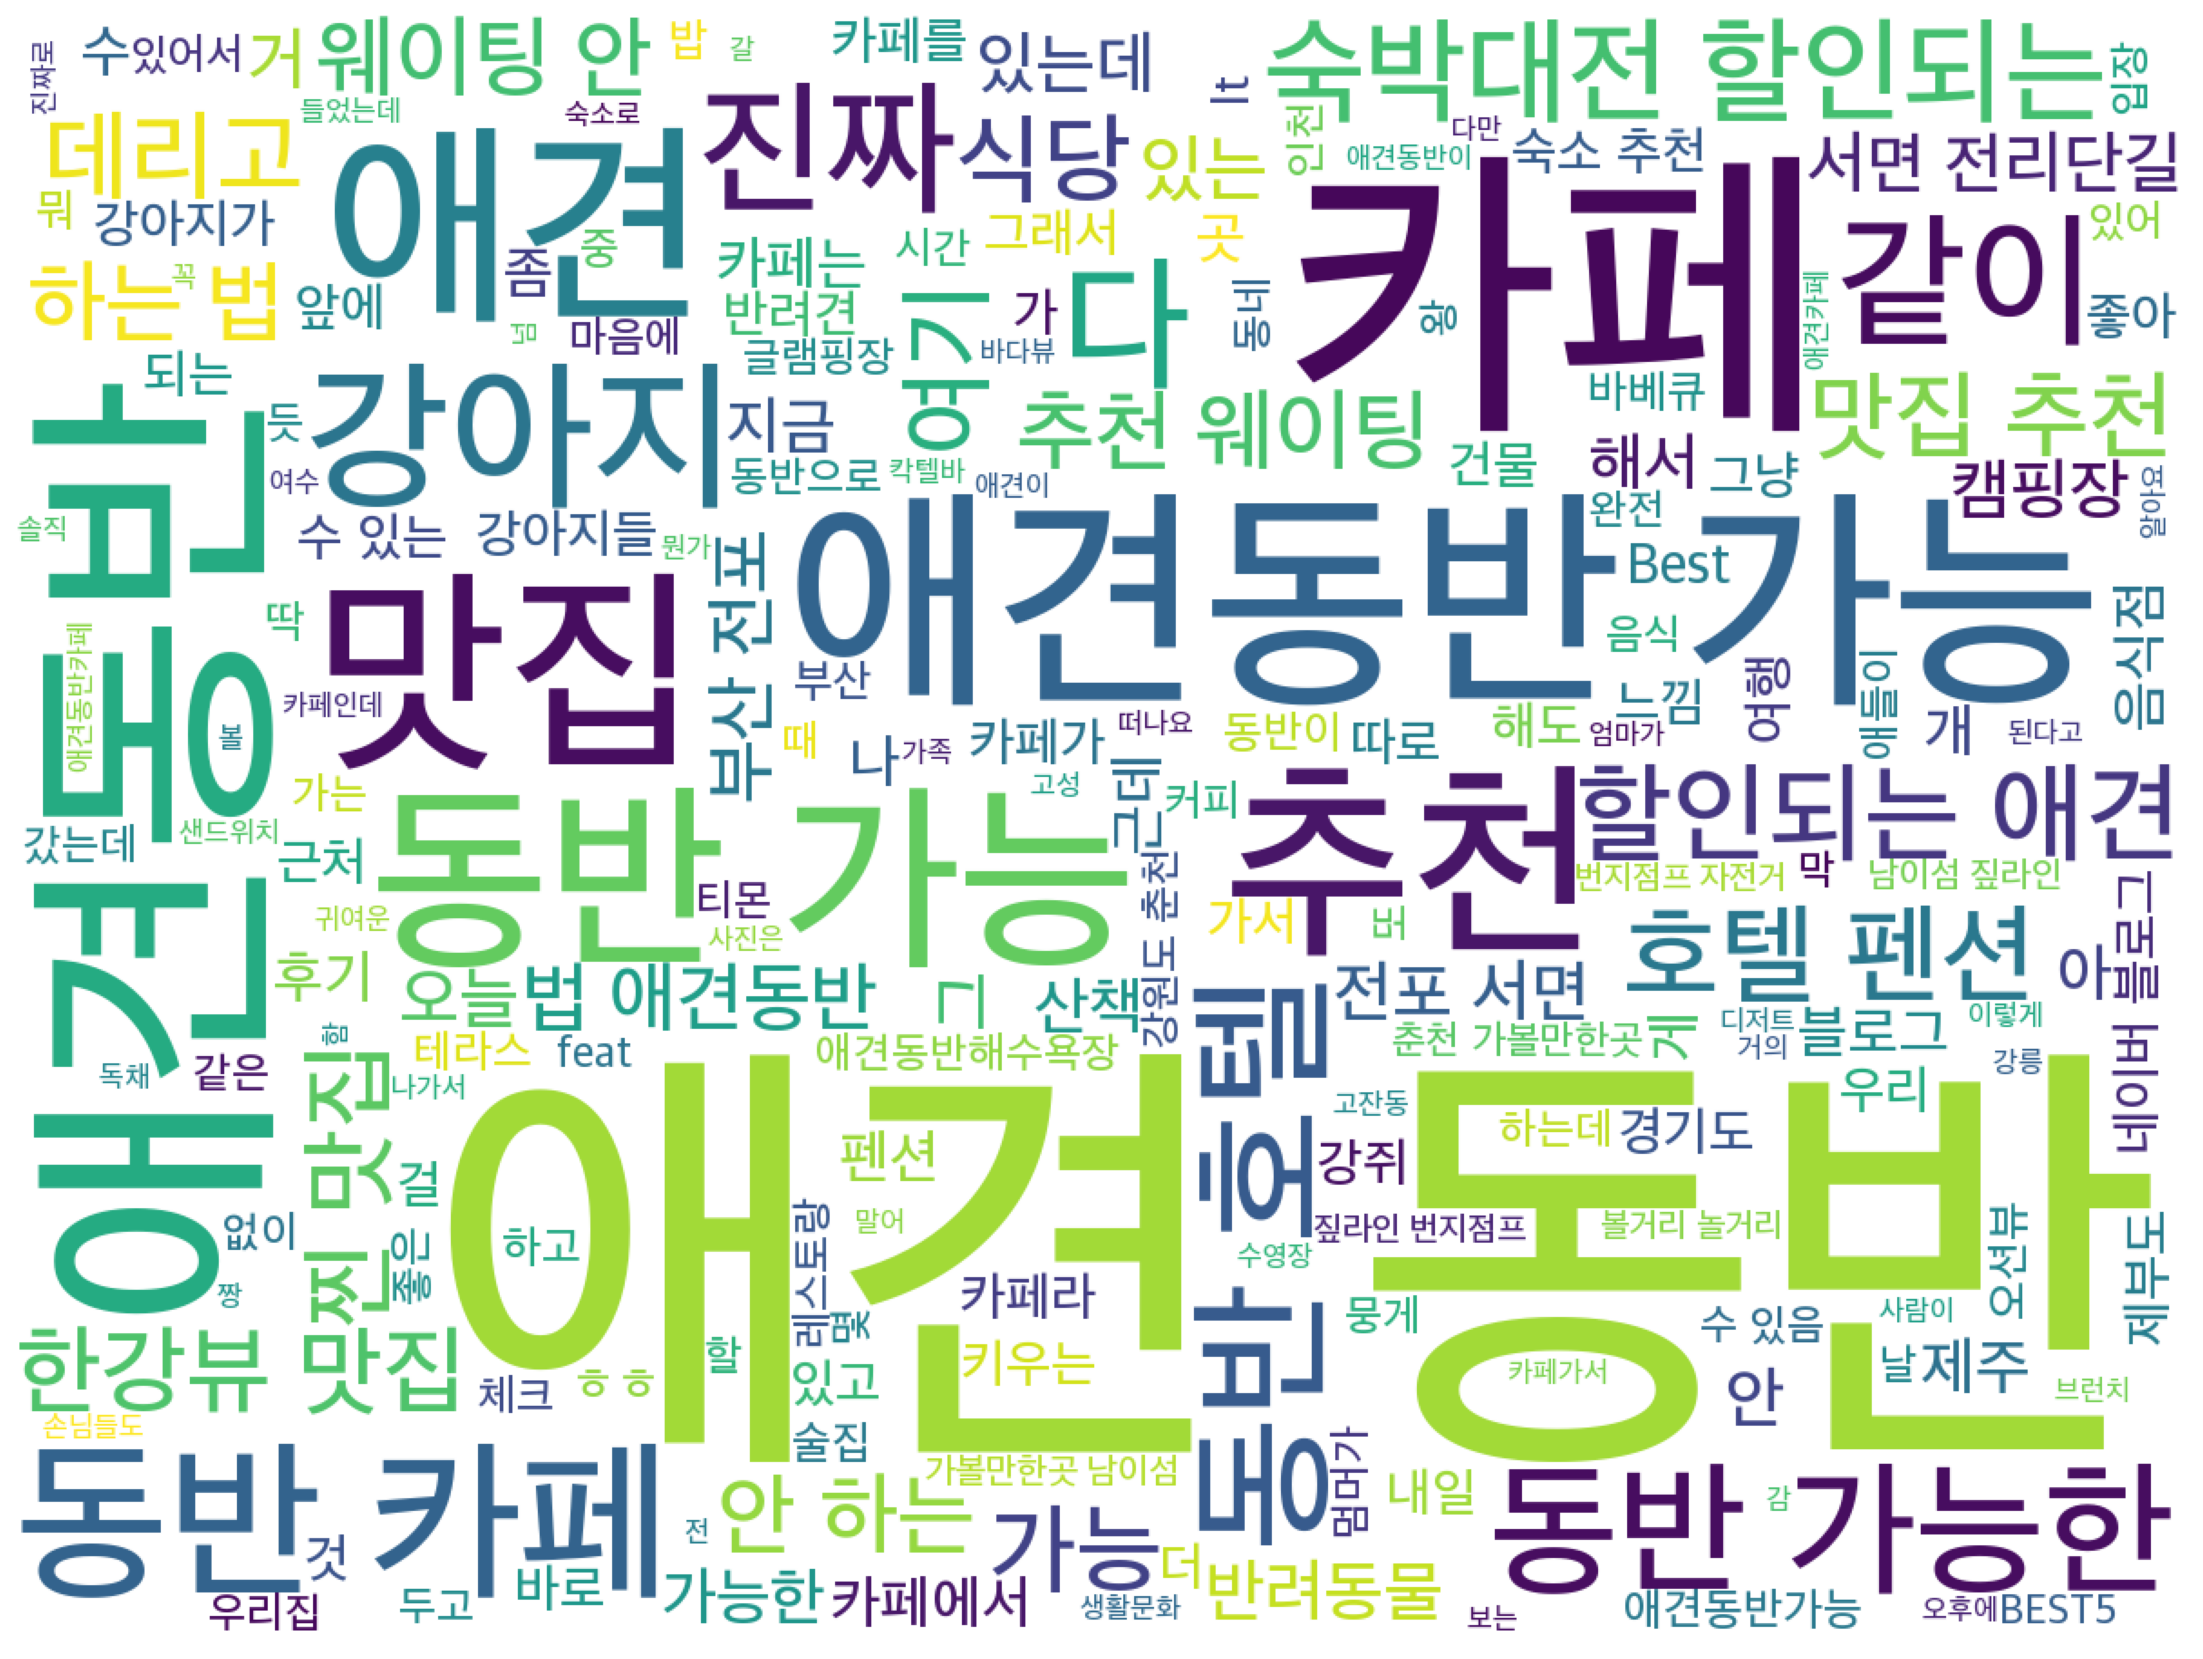

In [61]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

In [64]:
p1 = r'.*(가능 | 여행 | 제약 | 안 | 어디 | 추천 | 맛집 ).*'
collect01 = df[df['0'].str.match(p1)]
collect01.shape

(135, 1)

Wall time: 0 ns
Wall time: 0 ns


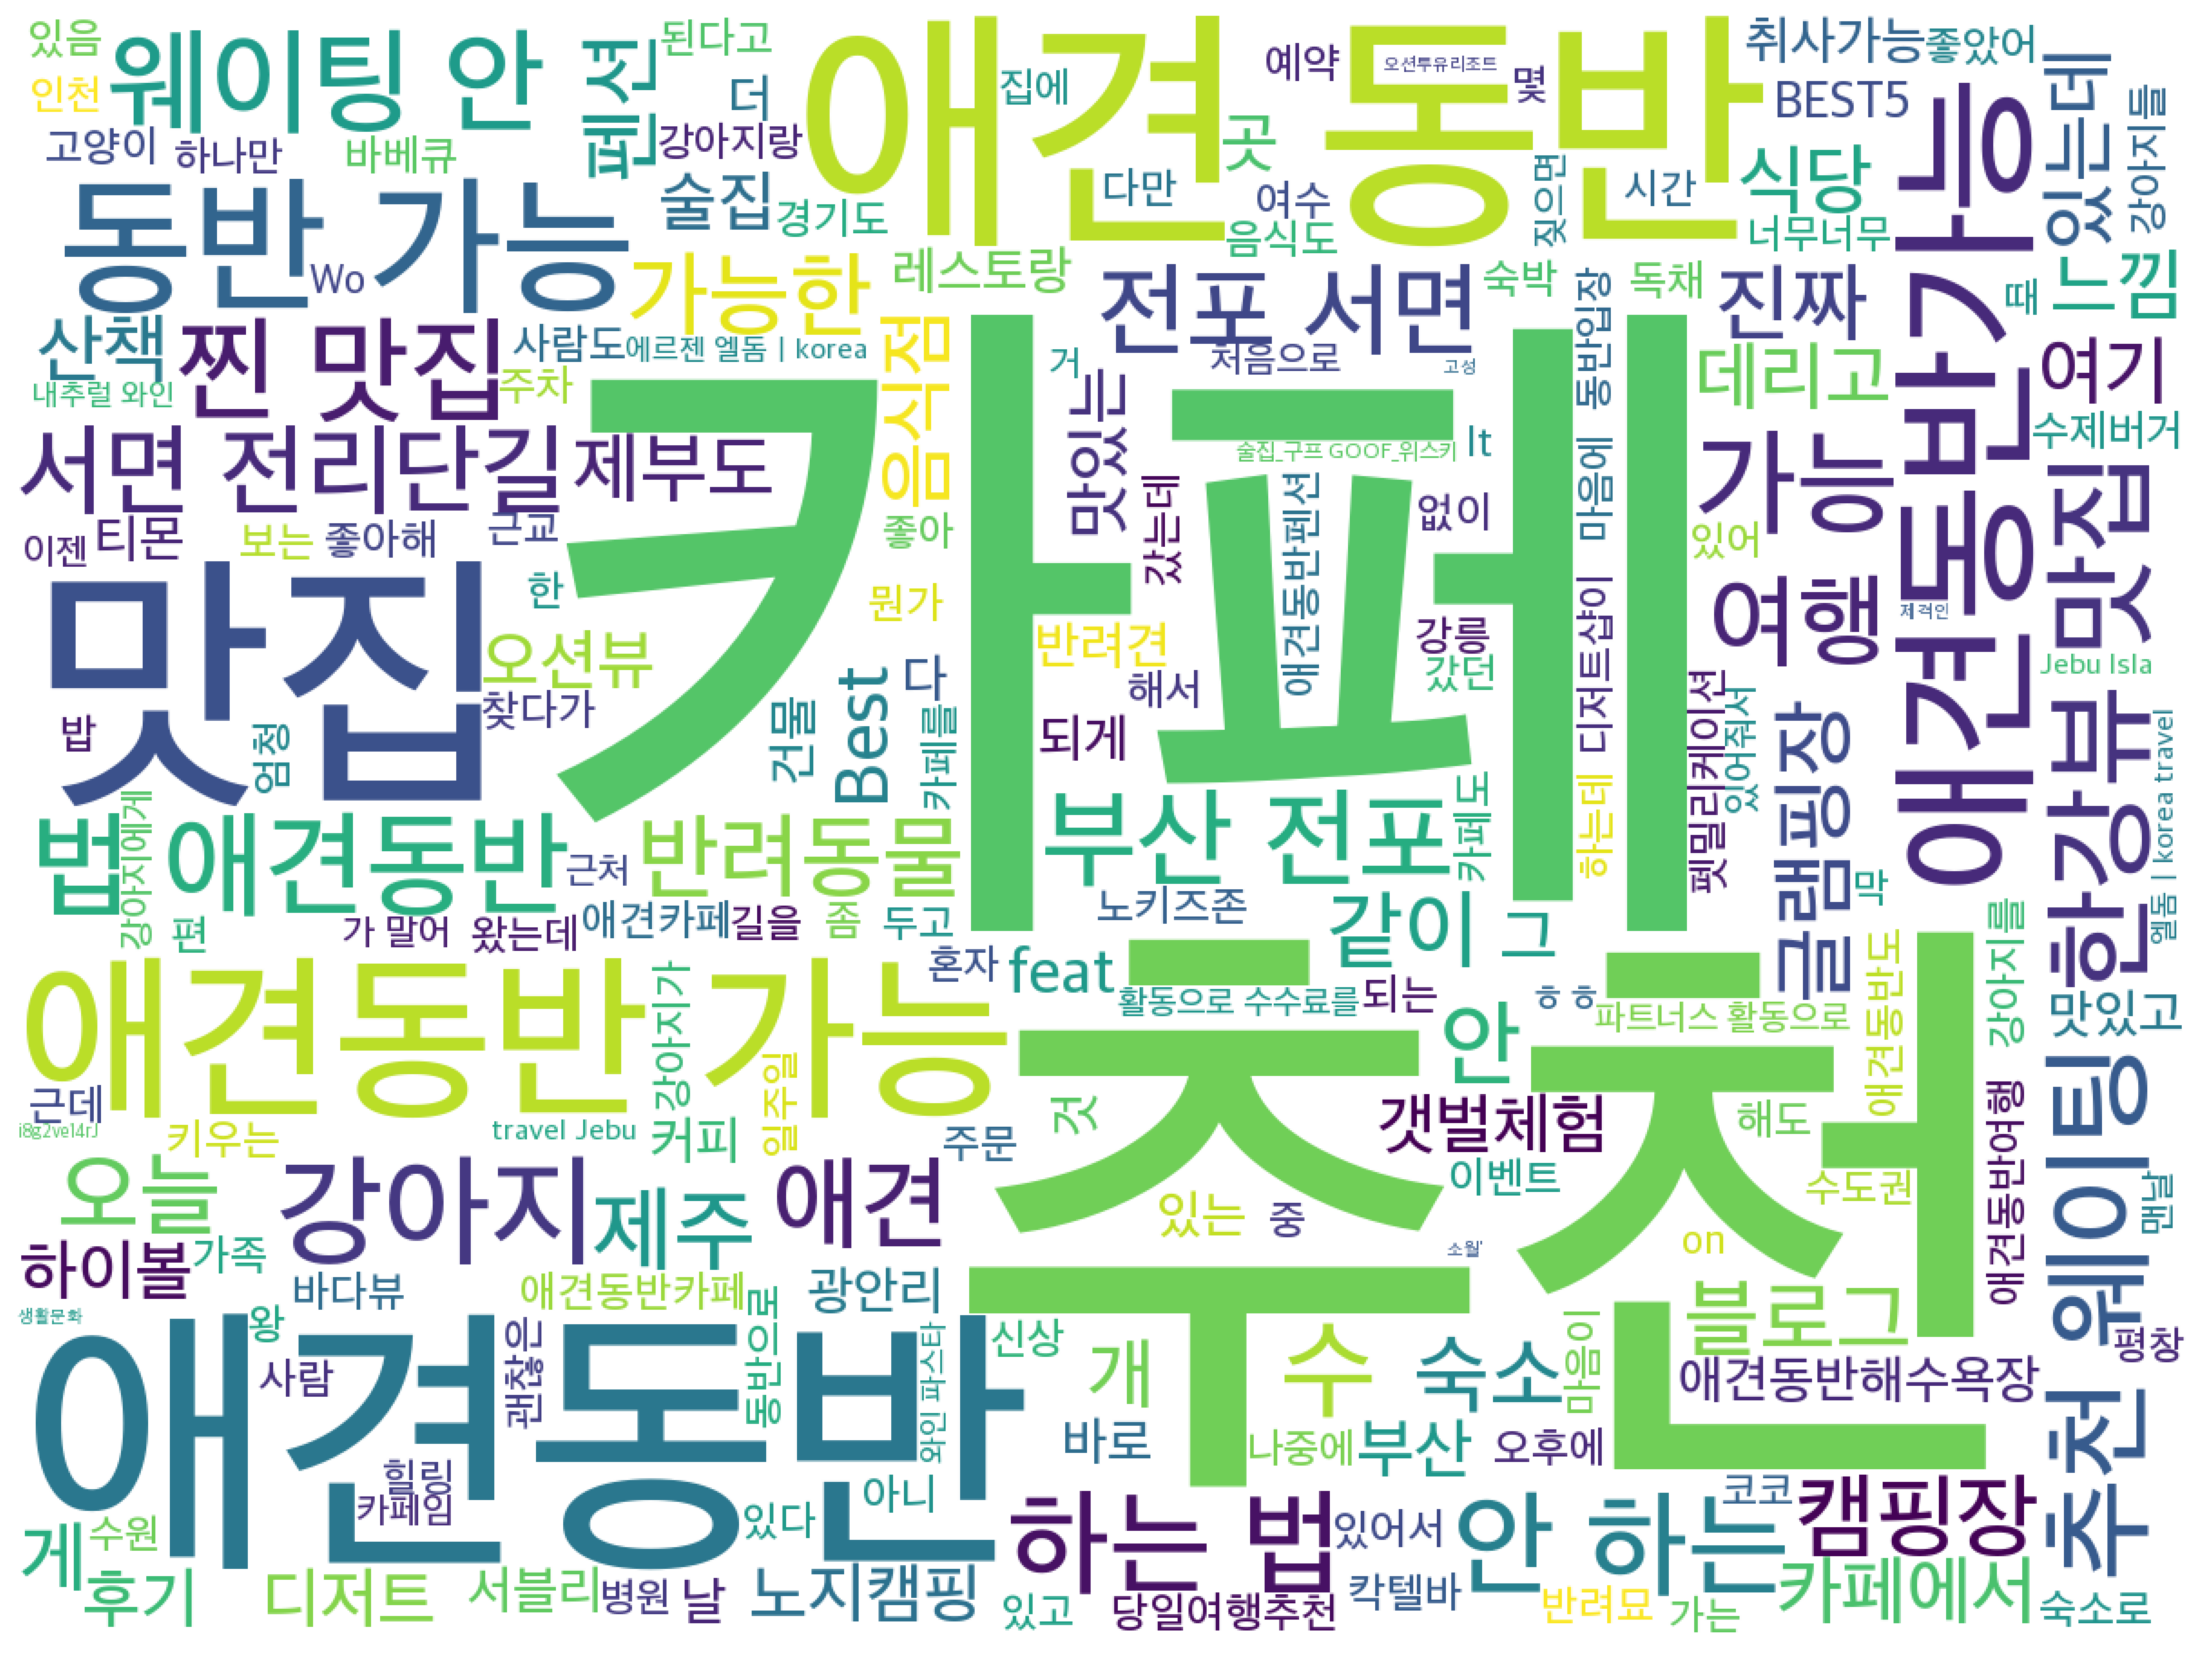

In [65]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

In [66]:
p1 = r'.*(가능 | 여행 | 제약 | 캠핑 | 추천 | 맛집 ).*'
collect01 = df[df['0'].str.match(p1)]
collect01.shape

(125, 1)

Wall time: 0 ns
Wall time: 0 ns


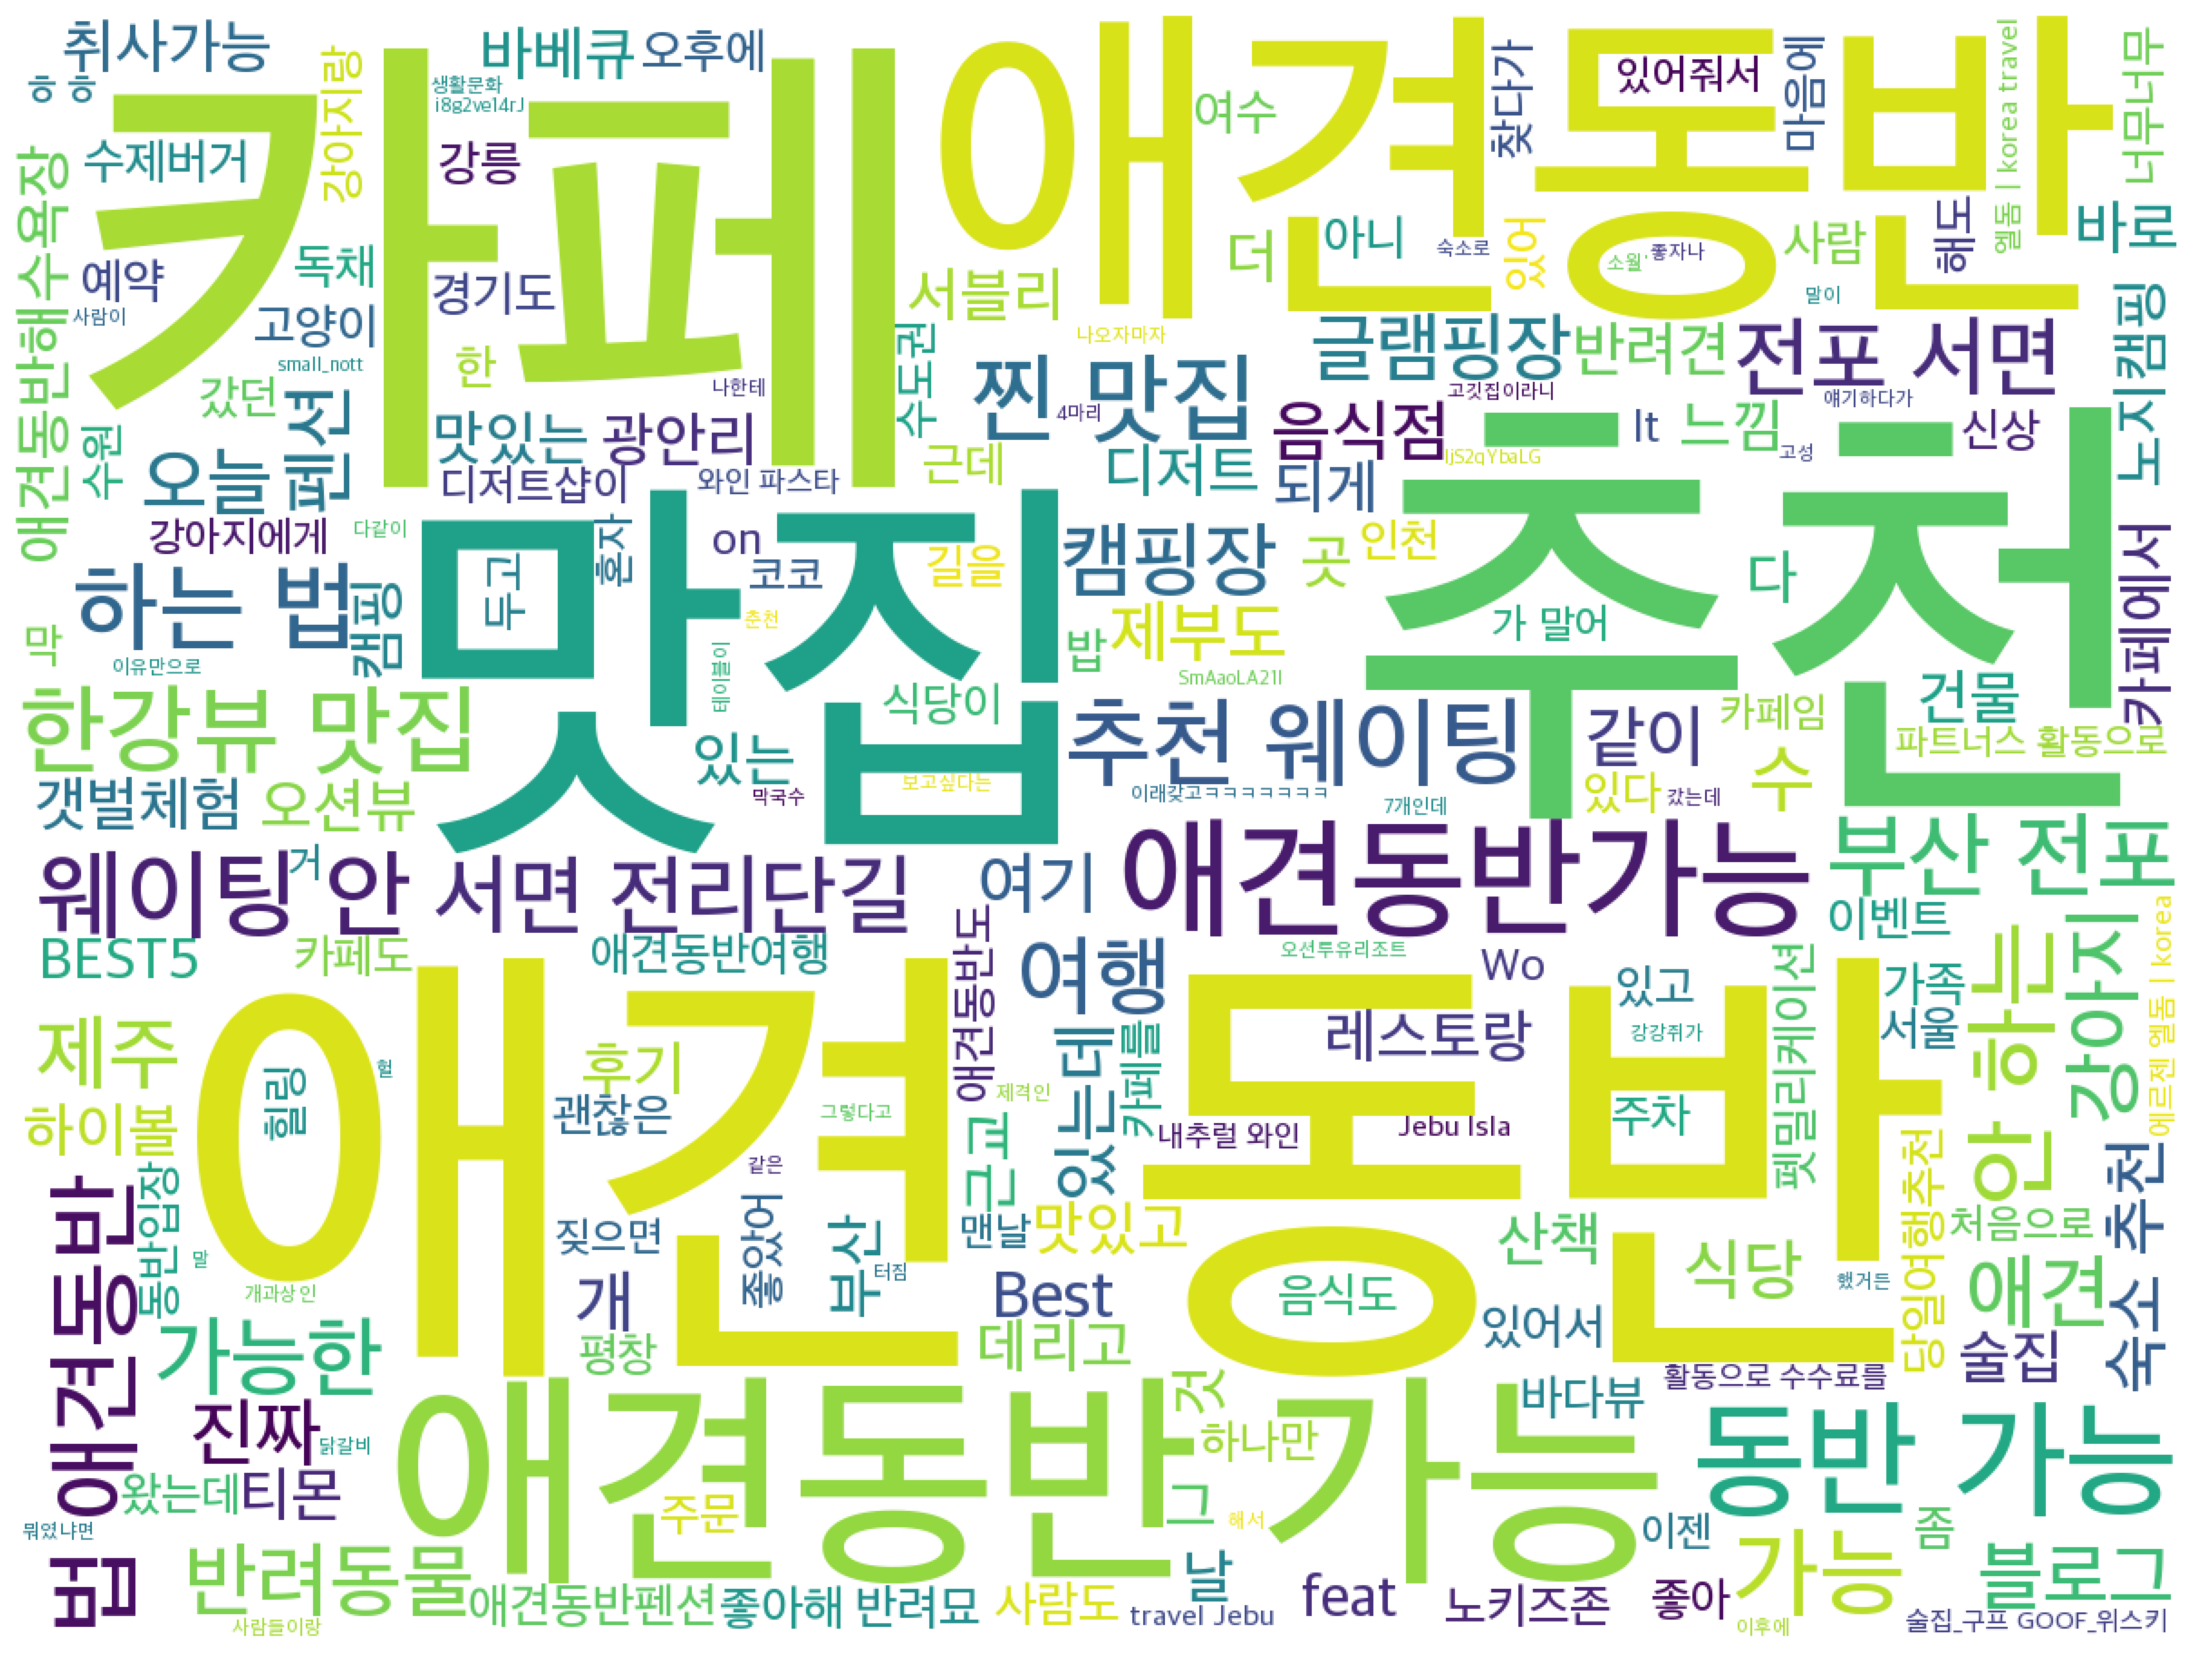

In [67]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))